# Web Scraping  with python--- Jean Carlos Vitola Cabarcas
link:https://www.cars.com/ 
Recuerde ejecutar cada celda en su orden, sino le puedo arrojar error  de varibale no definida

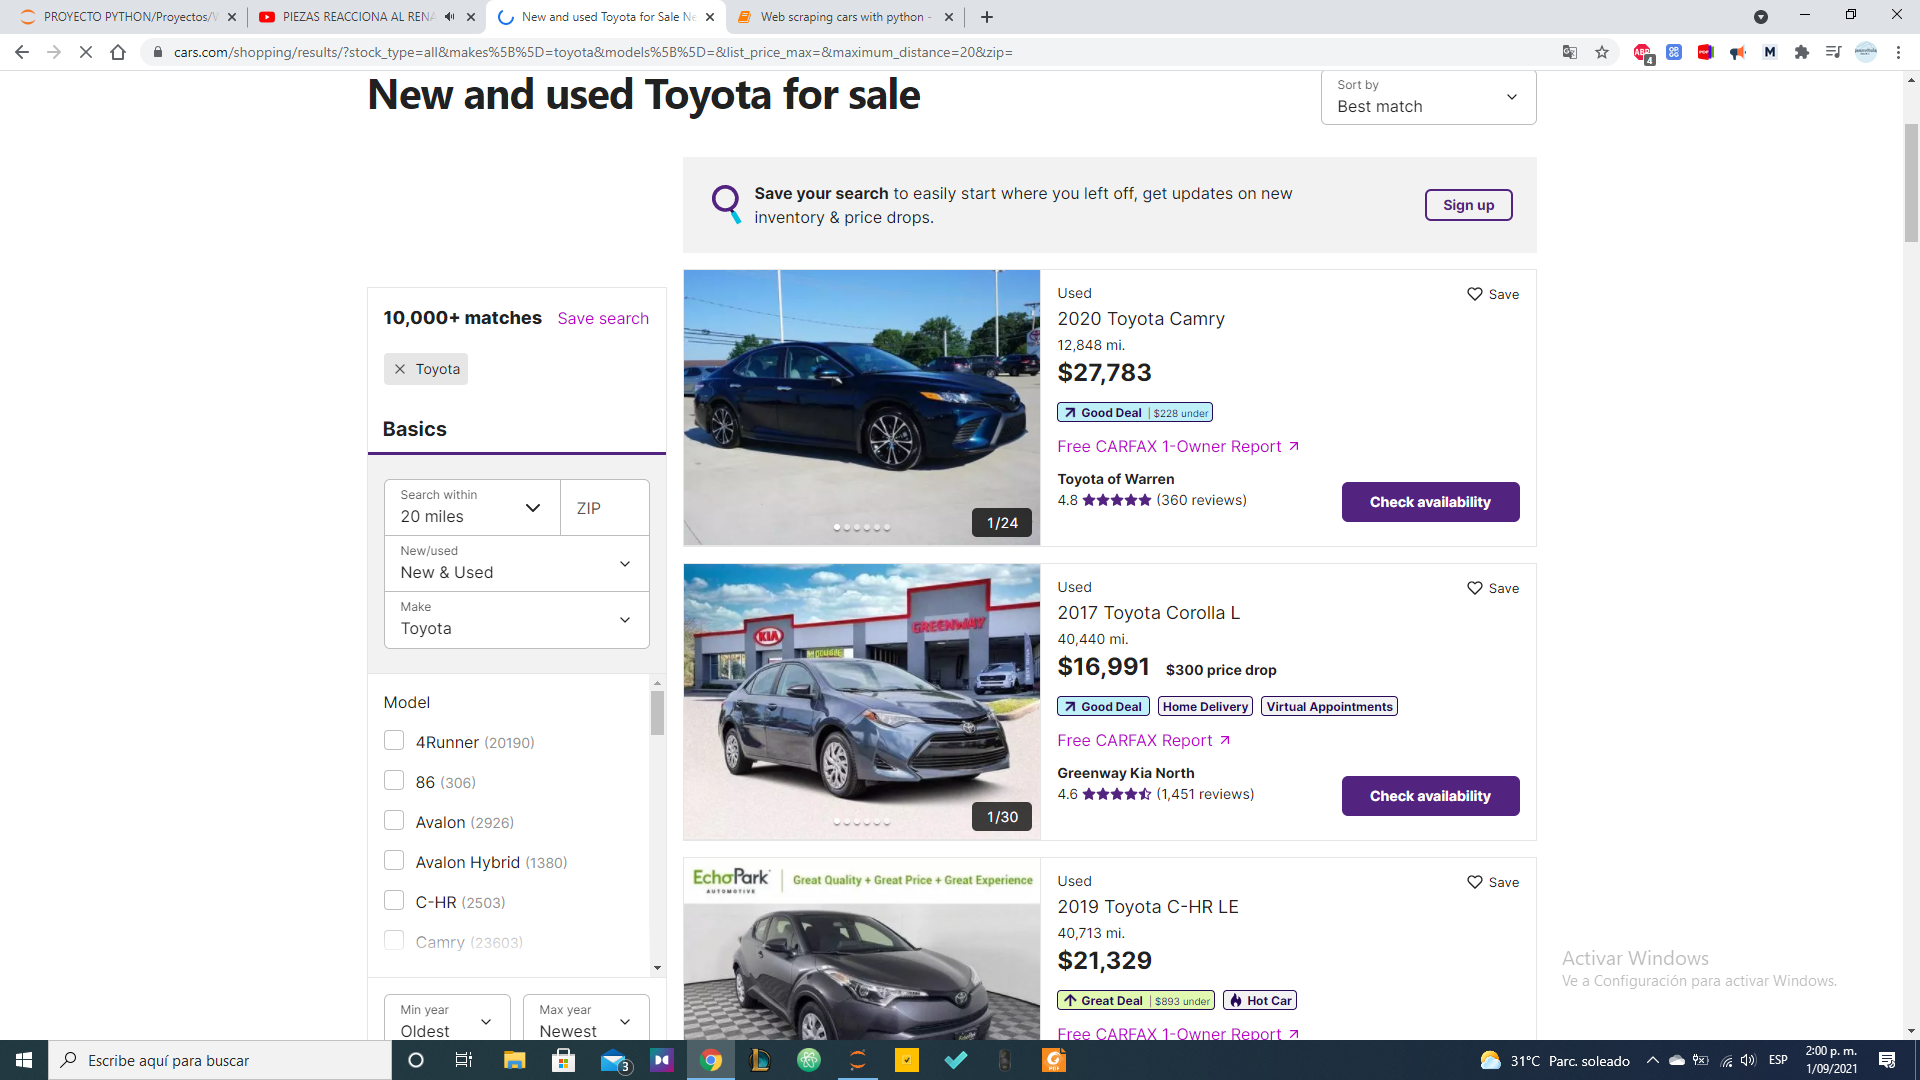


### 1) Importamos los módulos 


In [18]:
from bs4 import BeautifulSoup #pip install BeautifulSoup
import requests    #pip install requests
import pandas as pd  # pip install pandas , # pip install numpy

### 2) Petición HTTP GET

In [19]:
# Dirección la cual queremos escrapear
url="https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=toyota&models%5B%5D=&list_price_max=&maximum_distance=20&zip="

### 2.1 Get Requests

In [20]:
#objeto response para hacer la petición
response=requests.get(url)

### 2.2 Status code

In [21]:
response.status_code   # si  la salida es response 200(petición get con exito), 500 Servidor time our, 403 protección de scraper

200

### 3) Objeto Soup

In [22]:
soup= BeautifulSoup(response.content,"html.parser")  #el objeto soup nos permite usar los atributos para sacar las variables de interrres

In [11]:
soup # contenido de Html como estructura de  arból

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title data-suffix=" | Cars.com">Certified used Toyota for Sale Near Me | Cars.com</title>
<meta content="Shop Toyota vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ Toyota models nationwide." name="description"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Cars.com" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="Certified used Toyota for Sale Near Me | Cars.com" property="og:title"/>
<meta content="https://www.cars.com/shopping/results/" property="og:url"/>
<meta content="Shop Toyota vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ Toyota models nationwide." property="og:description"/>
<meta content="https://graphics

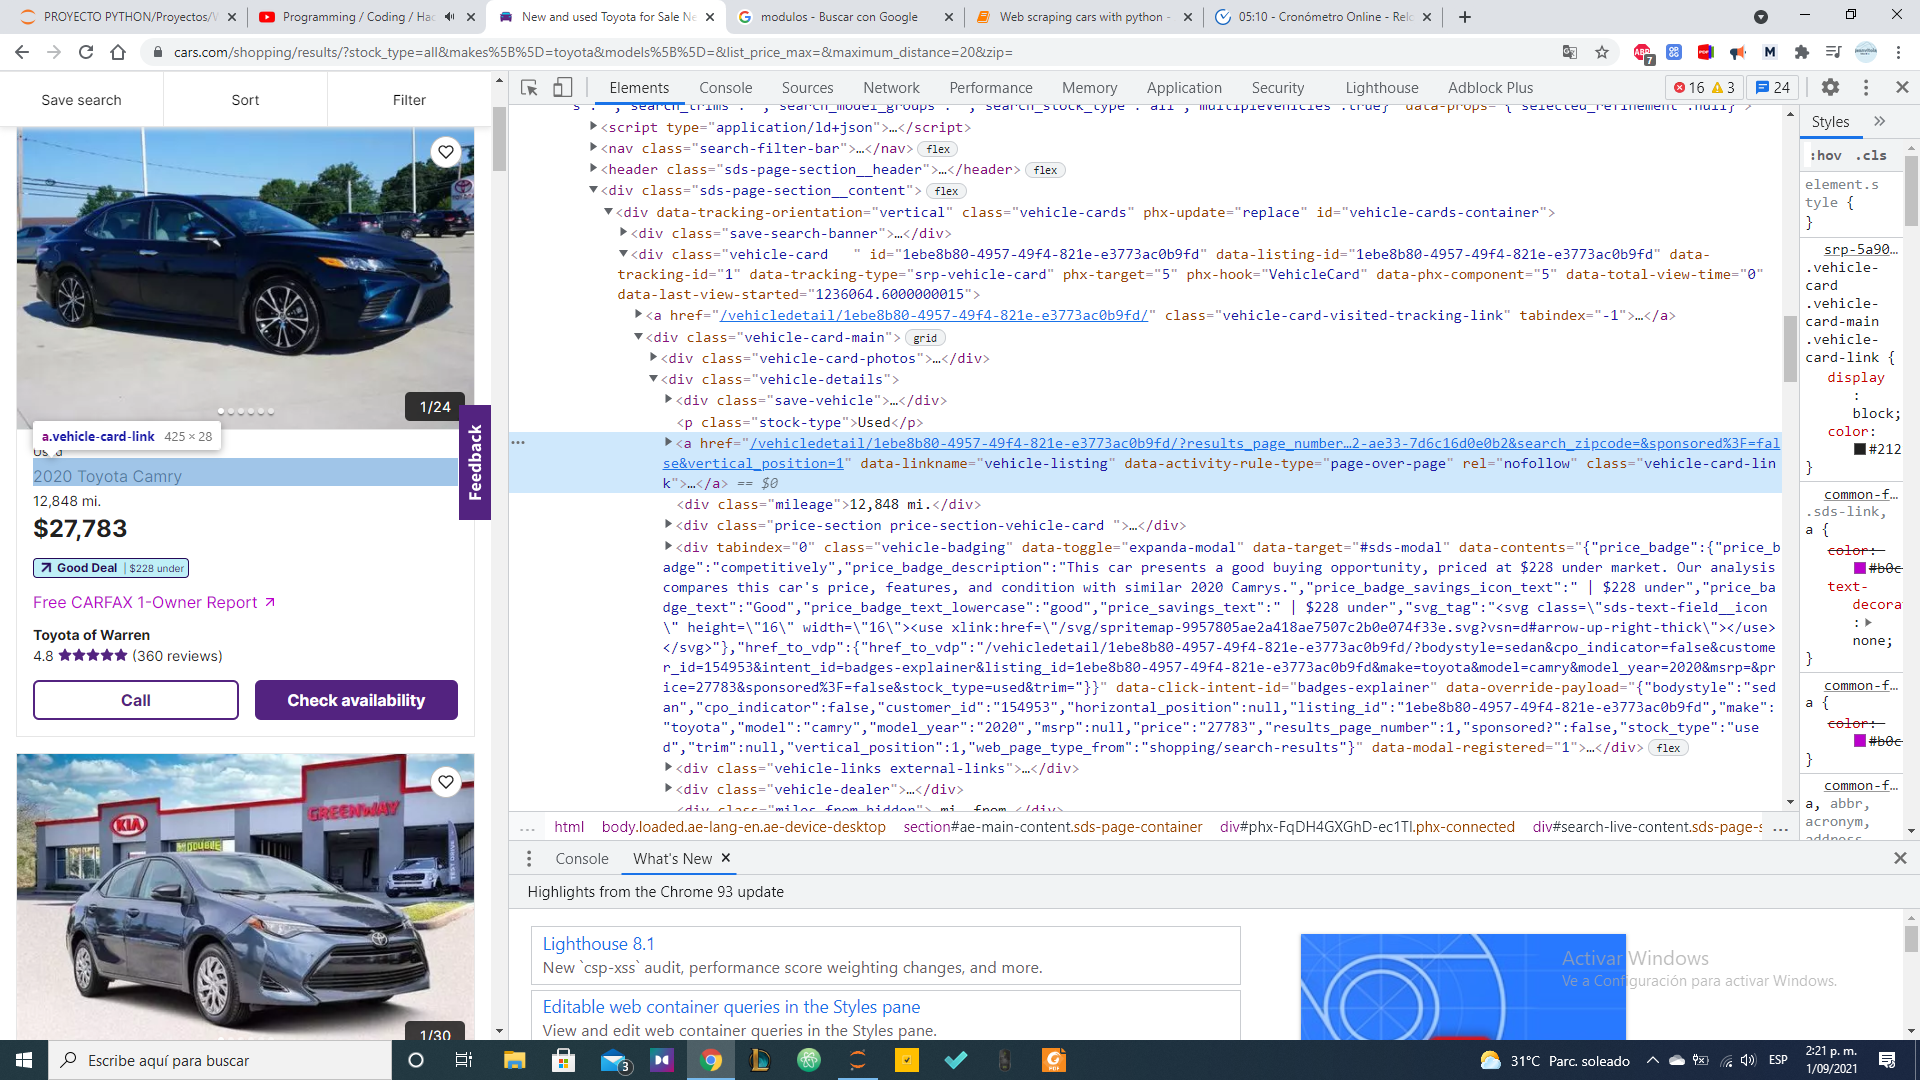


### Results

In [23]:
#Inspecciono el elemento que quiero parsear como contenedor 
results= soup.find_all("div",{"class":"vehicle-card-main"})
results


[<div class="vehicle-card-main">
 <div class="vehicle-card-photos">
 <div class="gallery-wrap">
 <div class="image-wrap" data-index="0">
 <a href="/vehicledetail/53131e64-84b5-40df-bcb4-cdef9c702c0c/">
 <img alt="" class="vehicle-image" loading="lazy" src="https://platform.cstatic-images.com/large/in/v2/a3026ec9-f14a-540d-875c-9785e8610e3e/94aa40bb-551b-4c71-8d2c-1778efb22143/NTfmxrsQhmZJTuzf7mcylMFprvI.jpg"/>
 </a>
 </div>
 <div class="image-wrap" data-index="1">
 <a href="/vehicledetail/53131e64-84b5-40df-bcb4-cdef9c702c0c/">
 <img alt="" class="vehicle-image" loading="lazy" src="https://platform.cstatic-images.com/large/in/v2/a3026ec9-f14a-540d-875c-9785e8610e3e/94aa40bb-551b-4c71-8d2c-1778efb22143/ZowqjsuDXiq7PSE1m_BaUJmQyPw.jpg"/>
 </a>
 </div>
 <div class="image-wrap" data-index="2">
 <a href="/vehicledetail/53131e64-84b5-40df-bcb4-cdef9c702c0c/">
 <img alt="" class="vehicle-image" loading="lazy" src="https://platform.cstatic-images.com/large/in/v2/a3026ec9-f14a-540d-875c-9785e86

In [24]:
object=results[0]

### Price

In [25]:

object.find("span",{"class":"primary-price"}).get_text()


'$20,963'

### Name


In [26]:
object.find("h2").text


'2019 Toyota Camry LE'

### Mileage

In [27]:
object.find("div",{"class":"mileage"}).text


'70,871 mi.'

### Rating

In [28]:
object.find("span",{"class":"sds-rating__count"}).text


'4.9'

### Dealer-name

In [29]:
object.find("div",{"class":"dealer-name"}).text.strip()


'North Park Toyota of San Antonio'

### Review

In [30]:
object.find("span",{"class":"sds-rating__link sds-button-link"}).text



'(1,739 reviews)'

### Image

In [31]:
object.find("img")["src"]


'https://platform.cstatic-images.com/large/in/v2/a3026ec9-f14a-540d-875c-9785e8610e3e/94aa40bb-551b-4c71-8d2c-1778efb22143/NTfmxrsQhmZJTuzf7mcylMFprvI.jpg'

### Url

In [32]:
object.find("a")["href"]

'/vehicledetail/53131e64-84b5-40df-bcb4-cdef9c702c0c/'

### For-Loop

In [33]:
name=[]
mileage=[]
dealer_name=[]
rating=[]
price=[]
img=[]
url=[]
jean="https://www.cars.com/"  # identificando el arbol, se observa que el link tiene una parte oculta de dirección


for result in results:
    try:
        name.append(result.find("h2").get_text())
        mileage.append(result.find("div",{"class":"mileage"}).text)
        dealer_name.append(result.find("div",{"class":"dealer-name"}).text.strip())
        rating.append(result.find("span",{"class":"sds-rating__count"}).text)
        price.append(result.find("span",{"class":"primary-price"}).get_text())
        img.append(object.find("img")["src"])
        url.append(jean + (object.find("a")["href"]))
        
    except: 
        name.append("n/a")
        mileage.append("n/a")
        dealer_name("n/a")
        rating.append("n/a")
        price.append("n/a")
        img.append("n/a")
        url.append("n/a")
    
   
    
   
   

### Create DataFrame

In [34]:
cars_sales=pd.DataFrame({"Name":name,"Mielage":mileage,"dealer_name":dealer_name,"Rating":rating,"Price":price,"Img":img,"Url":url})

In [35]:
cars_sales

,Name,Mielage,dealer_name,Rating,Price,Img,Url
0,2019 Toyota Camry LE,"70,871 mi.",North Park Toyota of San Antonio,4.9,"$20,963",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
1,2021 Toyota Venza XLE,"16,558 mi.",Toyota of Lincolnwood,4.1,"$38,775",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
2,2018 Toyota RAV4 XLE,"24,265 mi.",Passport Toyota,4.6,"$25,780",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
3,2018 Toyota Mirai Base,"33,039 mi.",Toyota Sunnyvale,4.8,"$13,992",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
4,2019 Toyota Tundra SR5,"20,476 mi.",Faulkner Toyota of Harrisburg,4.7,"$41,960",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
5,2020 Toyota Tacoma SR5,"22,946 mi.",Toyota of North Charlotte,4.7,"$32,995",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
6,2019 Toyota Tundra Platinum,"41,040 mi.",Sheehy Toyota of Fredericksburg,4.7,"$53,500",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
7,2021 Toyota RAV4 XLE Premium,"18,737 mi.",Tansky Sawmill Toyota,4.6,"$33,990",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
8,2021 Toyota Camry SE,"9,520 mi.",Sterling McCall Toyota,4.5,"$26,991",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...
9,2019 Toyota Highlander XLE,"33,967 mi.",Camelback Toyota,4.3,"$36,998",https://platform.cstatic-images.com/large/in/v...,https://www.cars.com//vehicledetail/53131e64-8...


### output Excel
    
    
    
    
    
    

In [36]:
cars_sales.to_excel("cars_sales.xlsx", index=False)


### Pagination

In [37]:
name=[]
mileage=[]
dealer_name=[]
rating=[]
price=[]
img=[]
urlx=[]


for i in range(1,30):
    
    #1) identificar rango de la paginación Variable del sitio
    url= 'https://www.cars.com/shopping/results/?page=' + str(i)+'&page_size=20&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=toyota&maximum_distance=20&mileage_max=&sort=best_match_desc&stock_type=cpo&year_max=&year_min=&zip='

    #Petición HTTP con requests
    response=requests.get(url)
    
    # Isntancio el objeto de BS
    soup= BeautifulSoup(response.content,"html.parser")
    
    # Busco los contenedores de los elementos a parsear
    
    results= soup.find_all("div",{"class":"vehicle-card-main"})
    
    for result in results:
        try:
            name.append(result.find("h2").get_text())
            mileage.append(result.find("div",{"class":"mileage"}).text)
            dealer_name.append(result.find("div",{"class":"dealer-name"}).text.strip())
            rating.append(result.find("span",{"class":"sds-rating__count"}).text)
            price.append(result.find("span",{"class":"primary-price"}).get_text())
            img.append(result.find("img")["src"])
            urlx.append((result.find("a")["href"]))
            
        except:
            name.append("n/a")
            mileage.append("n/a")
            dealer_name("n/a")
            rating.append("n/a")
            price.append("n/a")
            img.append("n/a")
            urlx.append("n/a")
            
            
        
    



In [37]:
jean_vitola=pd.DataFrame({"Name":name,"Mielage":mileage,"dealer_name":dealer_name,"Rating":rating,"Price":price,"Img":img, "Url":urlx})

In [12]:
jean_vitola

NameError: name 'jean_vitola' is not defined